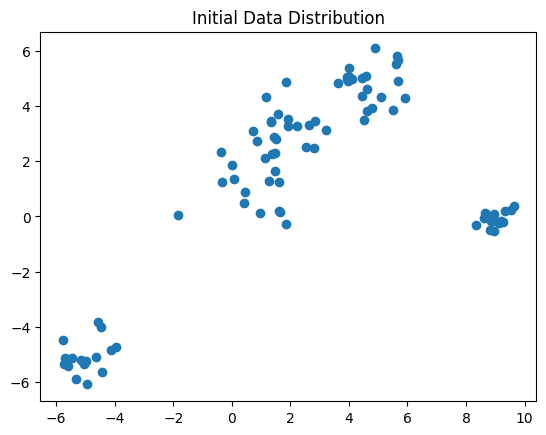

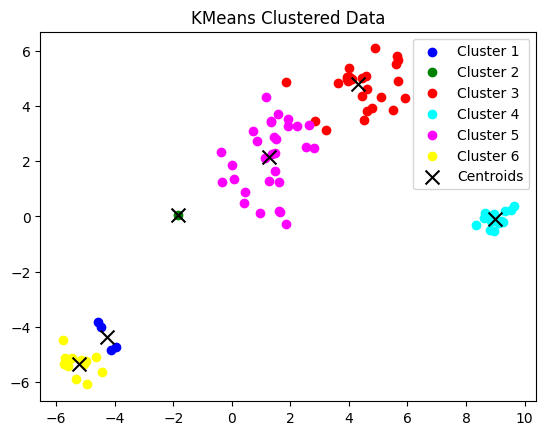

In [47]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
import numpy as np

# Create data
centroids = [(-5, -5), (5, 5), (1, 1),(2,3),(4,5),(9,0)]
cluster_std = [random.uniform(0, 1) for _ in range(len(centroids))]

X, y = make_blobs(
    n_samples=100, cluster_std=cluster_std, centers=centroids, n_features=3, random_state=3
)

plt.scatter(X[:, 0], X[:, 1])
plt.title("Initial Data Distribution")
plt.show()


# KMeans Class
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        # Initialize centroids randomly
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # Assign clusters
            cluster_grp = self.assign_cluster(X)

            # Move centroids
            old_center = self.centroids
            self.centroids = self.move_centroid(X, cluster_grp)

            # Check convergence
            if np.allclose(old_center, self.centroids):
                break

        return np.array(cluster_grp)

    def assign_cluster(self, X):
        cluster_grp = []
        for row in X:
            distances = [np.linalg.norm(row - centroid) for centroid in self.centroids]
            cluster_grp.append(np.argmin(distances))
        return np.array(cluster_grp)

    def move_centroid(self, X, cluster_grp):
        new_center = []
        for i in range(self.n_clusters):
            points_in_cluster = X[cluster_grp == i]
            new_center.append(points_in_cluster.mean(axis=0) if len(points_in_cluster) > 0 else self.centroids[i])
        return np.array(new_center)


# KMeans clustering
n_clusters = len(centroids)
km = KMeans(n_clusters=n_clusters, max_iter=100)
y_mean = km.fit_predict(X)
fig, ax = plt.subplots()

colors = [
    "blue", "green", "red", "cyan", "magenta", 
    "yellow", "black", "white", "orange", "pink", 
    "purple", "brown", "gray", "olive", "lime", 
    "teal", "navy", "maroon", "gold", "aqua"
]


plt.title("KMeans Clustered Data")
for i in range(n_clusters):
    plt.scatter(X[y_mean == i, 0], X[y_mean == i, 1], color=colors[i], label=f"Cluster {i+1}")
plt.scatter(km.centroids[:, 0], km.centroids[:, 1], color="black", marker="x", s=100, label="Centroids")
plt.legend()
plt.show()


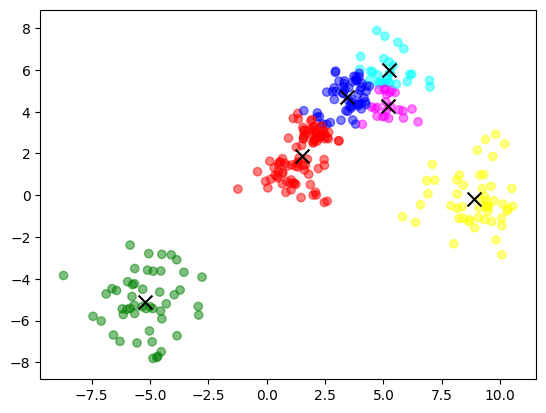

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
from sklearn.datasets import make_blobs

# Generate dataset
centroids = [(-5, -5), (5, 5), (1, 1), (2, 3), (4, 5), (9, 0)]
cluster_std = [random.uniform(0.5, 1.5) for _ in range(len(centroids))]
X, y = make_blobs(n_samples=300, centers=centroids, cluster_std=cluster_std, random_state=42)

# Custom KMeans class
class KMeans:
    def __init__(self, n_clusters=3, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.history = []  # To store centroid positions

    def fit(self, X):
        # Randomly initialize centroids
        random_indices = random.sample(range(X.shape[0]), self.n_clusters)
        self.centroids = X[random_indices]
        self.history.append(self.centroids.copy())

        for _ in range(self.max_iter):
            # Assign clusters
            cluster_grp = self.assign_cluster(X)
            # Move centroids
            old_centroids = self.centroids
            self.centroids = self.move_centroids(X, cluster_grp)
            self.history.append(self.centroids.copy())
            
            # Stop if centroids do not change
            if np.allclose(old_centroids, self.centroids):
                break
        return cluster_grp

    def assign_cluster(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def move_centroids(self, X, cluster_grp):
        new_centroids = []
        for i in range(self.n_clusters):
            points_in_cluster = X[cluster_grp == i]
            if len(points_in_cluster) > 0:
                new_centroids.append(points_in_cluster.mean(axis=0))
            else:
                # Keep the old centroid if no points are assigned
                new_centroids.append(self.centroids[i])
        return np.array(new_centroids)

# Initialize KMeans
n_clusters = len(centroids)
kmeans = KMeans(n_clusters=n_clusters, max_iter=10)
cluster_labels = kmeans.fit(X)

# Animation setup
fig, ax = plt.subplots()
colors = [
    "blue", "green", "red", "cyan", "magenta", 
    "yellow", "black", "white", "orange", "pink", 
    "purple", "brown", "gray", "olive", "lime", 
    "teal", "navy", "maroon", "gold", "aqua"
]


scat = ax.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)  # Initial points (gray)
centroid_scat = ax.scatter([], [], c='black', marker='x', s=100)  # Centroids

def init():
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    return scat, centroid_scat

def update(frame):
    centroids = kmeans.history[frame]  # Get centroids for this frame
    cluster_grp = kmeans.assign_cluster(X)  # Recalculate clusters

    # Update point colors based on clusters
    colors_for_points = [colors[grp] for grp in cluster_grp]
    scat.set_color(colors_for_points)

    # Update centroid positions
    centroid_scat.set_offsets(centroids)
    return scat, centroid_scat

ani = FuncAnimation(fig, update, frames=len(kmeans.history), init_func=init, interval=500, blit=True)
ani.save("kmeans_animation.gif", writer="pillow")

# Show animation
plt.show()
